In [12]:
from contextlib import closing
from citizen_browser_parsers import rds_connect

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy import stats

from analysis import FBCBData, load_cb_all, load_cb_unsponsored

In [6]:
db_params = {
    "endpoint": "citizenbrowser.cjfrb8ed0b9b.us-east-2.rds.amazonaws.com",
    "profile": "markup_prod",
}
with closing(rds_connect(**db_params)) as db:
    data_all = FBCBData(db, load_cb=load_cb_all)
    data_us = FBCBData(db, load_cb=load_cb_unsponsored)

In [10]:
df_all = data_all.joined_domains()
df_us = data_us.joined_domains()

In [11]:
df_all.join(df_us, lsuffix='_all', rsuffix='_us')

,unique_users_cb_all,rank_cb_all,rank_fb_all,unique_users_fb_all,unique_users_cb_us,rank_cb_us,rank_fb_us,unique_users_fb_us
url_domain,,,,,,,,
youtube.com,1614,1,1,1.813000e+11,1604,1,1,1.813000e+11
amazon.com,1249,4,2,1.346000e+11,1041,4,2,1.346000e+11
unicef.org,916,9,3,1.344000e+11,865,8,3,1.344000e+11
gofundme.com,768,16,4,1.248000e+11,761,13,4,1.248000e+11
twitter.com,1010,6,5,1.161000e+11,978,5,5,1.161000e+11
media1.tenor.co,815,13,6,1.156000e+11,815,11,6,1.156000e+11
m.tiktok.com,601,31,7,1.107000e+11,599,24,7,1.107000e+11
open.spotify.com,680,21,8,9.300000e+10,639,20,8,9.300000e+10
playeralumniresources.com,462,50,9,8.990000e+10,462,38,9,8.990000e+10


In [14]:
stats.kendalltau(df_us.sort_values('rank_cb').index, df_all.sort_values('rank_cb').index)

KendalltauResult(correlation=0.6526315789473685, pvalue=1.7153751868888245e-05)

In [18]:
data_all.correlation_domains()

KendalltauResult(correlation=0.4736842105263158, pvalue=0.0029943591168169765)

In [19]:
data_us.correlation_domains()

KendalltauResult(correlation=0.2736842105263158, pvalue=0.0983302187347563)

<AxesSubplot:xlabel='rank_fb', ylabel='rank_cb'>

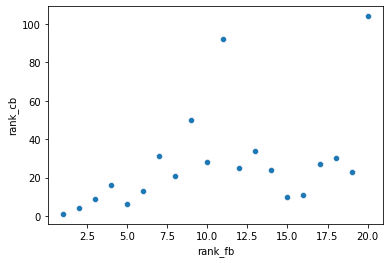

In [22]:
sns.scatterplot(data=df_all, x='rank_fb', y='rank_cb')

<AxesSubplot:xlabel='rank_fb', ylabel='rank_cb'>

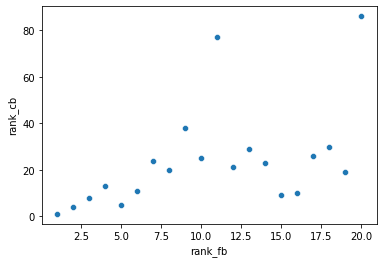

In [23]:
sns.scatterplot(data=df_us, x='rank_fb', y='rank_cb')

<AxesSubplot:xlabel='unique_users_fb', ylabel='unique_users_cb'>

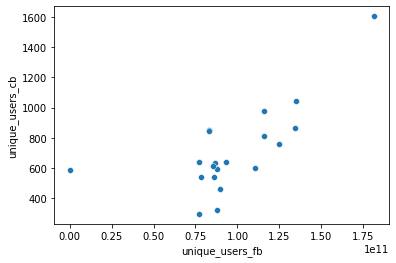

In [24]:
sns.scatterplot(data=df_us, x='unique_users_fb', y='unique_users_cb')

<AxesSubplot:xlabel='unique_users_fb', ylabel='unique_users_cb'>

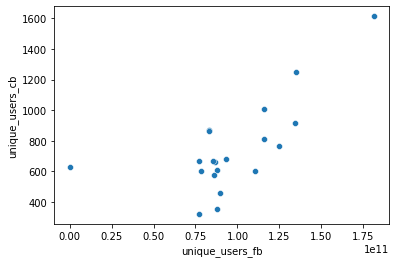

In [25]:
sns.scatterplot(data=df_all, x='unique_users_fb', y='unique_users_cb')

In [29]:
d = df_us.sort_values('rank_fb')
stats.kendalltau(d.rank_fb, d.rank_cb)

KendalltauResult(correlation=0.4631578947368421, pvalue=0.003782664567027279)

In [27]:
d = df_all.sort_values('rank_fb')
stats.kendalltau(d.rank_fb, d.rank_cb)

KendalltauResult(correlation=0.4105263157894737, pvalue=0.011101359934968412)